FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/fashionmnist/fmnist/fashion-mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

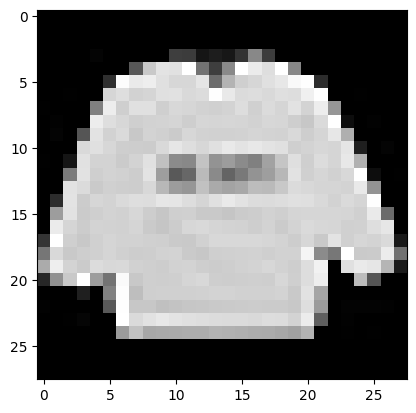

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist


**Escalonando os dados**

- Como não precisamos escalonar as labels, apenas selecionamos os dados da coluna 1 em diante
- O escalonador escolhido foi o MinMaxScaler, que converterá os dados para valores contidos no intervalo entre 0 e 1

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(data.values[:,1:])
scaled_data = model.transform(data.values[:,1:])

Mostrando que o novo intervalo dos dados realmente é [0, 1]

In [18]:
import numpy as np
np.min(scaled_data)

0.0

In [19]:
np.max(scaled_data)

1.0

In [20]:
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Substituindo os dados originais do DataFrame pelos dados escalonados

In [21]:
for row in data.index.values:
  data.loc[row, data.columns[1:]] = scaled_data[row]

Agora temos um DataFrame com os dados escalonados

In [23]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split

Separando os 60000 exemplos do conjunto de treino em dados de treino e dados de validação

In [26]:
(trainData, valData, trainLabels, valLabels) = train_test_split(data.values[:,1:], data.values[:,0],
test_size=0.1, stratify = data.values[:,0], random_state=87)

In [27]:
print("training data points: {}".format(len(trainLabels)))
print("validating data points: {}".format(len(valLabels)))

training data points: 54000
validating data points: 6000


Variando o valor de k, de forma que o modelo possa ter sua acurácia testada para cada k escolhido

In [28]:
kVals = range(1, 30, 1)
accuracies = []

Usando os dados de validação para testar a acurácia do modelo para cada k escolhido

A função de distância escolhida foi a euclidiana

In [101]:
for k in kVals:
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.95%
k=2, accuracy=84.78%
k=3, accuracy=85.57%
k=4, accuracy=85.87%
k=5, accuracy=85.85%
k=6, accuracy=85.87%
k=7, accuracy=85.72%
k=8, accuracy=85.67%
k=9, accuracy=85.68%
k=10, accuracy=85.55%
k=11, accuracy=85.53%
k=12, accuracy=85.42%
k=13, accuracy=85.33%
k=14, accuracy=85.30%
k=15, accuracy=85.05%
k=16, accuracy=84.87%
k=17, accuracy=84.87%
k=18, accuracy=84.75%
k=19, accuracy=84.72%
k=20, accuracy=84.50%
k=21, accuracy=84.65%
k=22, accuracy=84.48%
k=23, accuracy=84.27%
k=24, accuracy=84.32%
k=25, accuracy=84.32%
k=26, accuracy=84.23%
k=27, accuracy=83.98%
k=28, accuracy=83.82%
k=29, accuracy=83.80%


Imprimindo em um gráfico os valores da acurácia em função de k

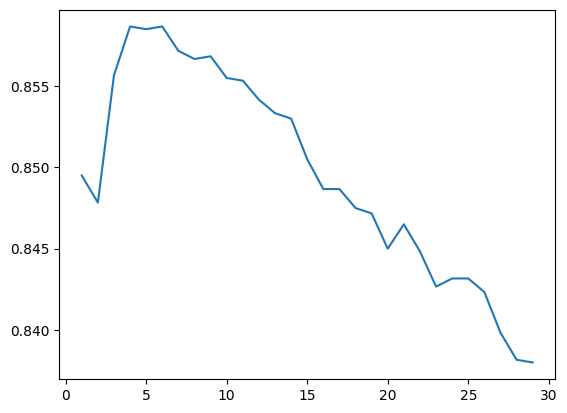

In [102]:
plt.plot(kVals, accuracies)

Agora vamos repetir o que fizemos, mas usando a distância de manhattan

In [103]:
acuracias = []

In [104]:
for k in kVals:
        model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        model_manhattan.fit(trainData, trainLabels)
        score_manhattan = model_manhattan.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score_manhattan * 100))
        acuracias.append(score_manhattan)

k=1, accuracy=85.37%
k=2, accuracy=84.80%
k=3, accuracy=85.92%
k=4, accuracy=85.82%
k=5, accuracy=86.00%
k=6, accuracy=86.43%
k=7, accuracy=86.57%
k=8, accuracy=86.08%
k=9, accuracy=85.72%
k=10, accuracy=86.02%
k=11, accuracy=85.70%
k=12, accuracy=85.85%
k=13, accuracy=85.62%
k=14, accuracy=85.73%
k=15, accuracy=85.40%
k=16, accuracy=85.42%
k=17, accuracy=85.37%
k=18, accuracy=85.45%
k=19, accuracy=85.30%
k=20, accuracy=85.22%
k=21, accuracy=85.15%
k=22, accuracy=85.07%
k=23, accuracy=84.88%
k=24, accuracy=84.75%
k=25, accuracy=84.92%
k=26, accuracy=84.78%
k=27, accuracy=84.80%
k=28, accuracy=84.55%
k=29, accuracy=84.65%


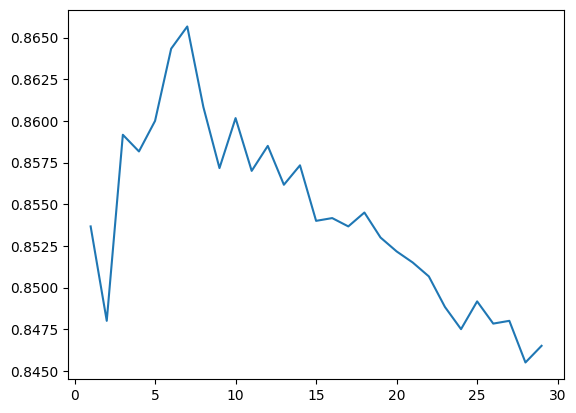

In [105]:
plt.plot(kVals, acuracias)

Agora vamos repetir o que fizemos, mas usando a distância de cosine

In [106]:
acuraciasCosine = []

In [107]:
for k in kVals:
        model_cosine = KNeighborsClassifier(n_neighbors=k, metric='cosine')
        model_cosine.fit(trainData, trainLabels)
        score_cosine = model_cosine.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score_cosine * 100))
        acuraciasCosine.append(score_cosine)

k=1, accuracy=85.43%
k=2, accuracy=85.15%
k=3, accuracy=85.30%
k=4, accuracy=85.65%
k=5, accuracy=85.35%
k=6, accuracy=85.45%
k=7, accuracy=85.42%
k=8, accuracy=85.32%
k=9, accuracy=85.28%
k=10, accuracy=85.25%
k=11, accuracy=85.13%
k=12, accuracy=84.88%
k=13, accuracy=84.93%
k=14, accuracy=85.10%
k=15, accuracy=84.95%
k=16, accuracy=84.97%
k=17, accuracy=84.85%
k=18, accuracy=84.77%
k=19, accuracy=84.48%
k=20, accuracy=84.67%
k=21, accuracy=84.32%
k=22, accuracy=84.38%
k=23, accuracy=84.33%
k=24, accuracy=84.35%
k=25, accuracy=84.12%
k=26, accuracy=84.17%
k=27, accuracy=84.15%
k=28, accuracy=84.02%
k=29, accuracy=83.85%


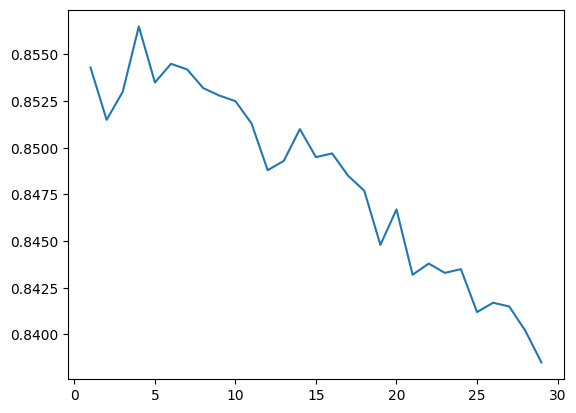

In [29]:
plt.plot(kVals, acuraciasCosine)

Como k = 7 com a função de distância de manhattan teve a melhor acurácia, vamos escolher esse valor de k e essa função de distância para usar no modelo

In [32]:
modelo = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
modelo.fit(trainData, trainLabels)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Importando os 10000 exemplos do conjunto de teste

In [33]:
data_test = pd.read_csv('/content/drive/MyDrive/fashionmnist/fmnist/fashion-mnist_test.csv')

In [34]:
data_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Escalonando os dados de teste da coluna 1 em diante usando MinMaxScaler

In [35]:
scalerTest = MinMaxScaler()
modelTest = scalerTest.fit(data_test.values[:,1:])
scaled_dataTest = modelTest.transform(data_test.values[:,1:])

Mostrando que o novo intervalo dos dados de teste realmente é [0, 1]

In [37]:
np.min(scaled_dataTest)

0.0

In [38]:
np.max(scaled_dataTest)

1.0

In [39]:
scaled_dataTest

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00487805,
        0.        ],
       [0.        , 0.02222222, 0.01376147, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Substituindo os dados originais do DataFrame pelos dados escalonados

In [36]:
for row in data_test.index.values:
  data_test.loc[row, data_test.columns[1:]] = scaled_dataTest[row]

In [40]:
data_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.041284,0.032787,...,0.405512,0.345238,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.133858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.05668,0.243119,0.405738,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.129167,0.000000,0.000000,0.0
3,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.539370,0.500000,0.549020,0.000000,0.521569,0.878431,0.925000,0.248889,0.000000,0.0
4,3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.125984,0.091270,0.054902,0.078431,0.000000,0.000000,0.004167,0.000000,0.000000,0.0
9996,6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.116667,0.000000,0.000000,0.0
9997,8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.688976,0.682540,0.674510,0.713725,0.780392,0.870588,0.175000,0.000000,0.004878,0.0
9998,8,0.0,0.022222,0.013761,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


Separando os rótulos das imagens dos pixels das imagens

In [41]:
dataTest = data_test.values[:,1:]
dataTestLabels = data_test.values[:,0]

A acurácia do modelo final foi 86.48%

In [42]:
score_test_manhattan = modelo.score(dataTest, dataTestLabels)
print("accuracy=%.2f%%" % (score_test_manhattan * 100))

accuracy=86.48%
